In [ ]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data.xlsx')
df.head(5)

,CODIGO_CARRERA_UCSH,Nombre IES,Nombre Carrera,Jornada,Vacantes Semestre Uno,Matrícula Anual,Costo Titulación,Arancel Anual,Año,TOTAL MATRICULADOS PRIMER AÑO,TOTAL MATRICULADOS
0,11,UNIVERSIDAD CATOLICA CARDENAL RAUL SILVA HENRI...,PEDAGOGIA EN RELIGION EN EDUCACION BASICA Y MEDIA,Diurno,15,104100,206000,2356400,2016,9.0,66
1,31,UNIVERSIDAD CATOLICA CARDENAL RAUL SILVA HENRI...,PEDAGOGIA EN EDUCACION BASICA,Diurno,55,255650,235000,2556500,2016,50.0,160
2,32,UNIVERSIDAD CATOLICA CARDENAL RAUL SILVA HENRI...,PEDAGOGIA EN EDUCACION BASICA (V),Vespertino,45,255650,235000,2556500,2016,38.0,129
3,41,UNIVERSIDAD CATOLICA CARDENAL RAUL SILVA HENRI...,EDUCACION PARVULARIA,Diurno,75,245815,226000,2458150,2016,66.0,177
4,51,UNIVERSIDAD CATOLICA CARDENAL RAUL SILVA HENRI...,PEDAGOGIA EN EDUCACION DIFERENCIAL,Diurno,105,255650,235000,2556500,2016,115.0,413


In [ ]:
df.columns

Index(['CODIGO_CARRERA_UCSH', 'Nombre IES', 'Nombre Carrera', 'Jornada',
       'Vacantes Semestre Uno', 'Matrícula Anual', 'Costo Titulación',
       'Arancel Anual', 'Año', 'TOTAL MATRICULADOS PRIMER AÑO',
       'TOTAL MATRICULADOS'],
      dtype='object')

In [ ]:
# Filtrar solo las columnas numéricas
quant_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas seleccionadas:", quant_cols.tolist())

Columnas numéricas seleccionadas: ['CODIGO_CARRERA_UCSH', 'Vacantes Semestre Uno', 'Matrícula Anual', 'Costo Titulación', 'Arancel Anual', 'Año', 'TOTAL MATRICULADOS PRIMER AÑO', 'TOTAL MATRICULADOS']


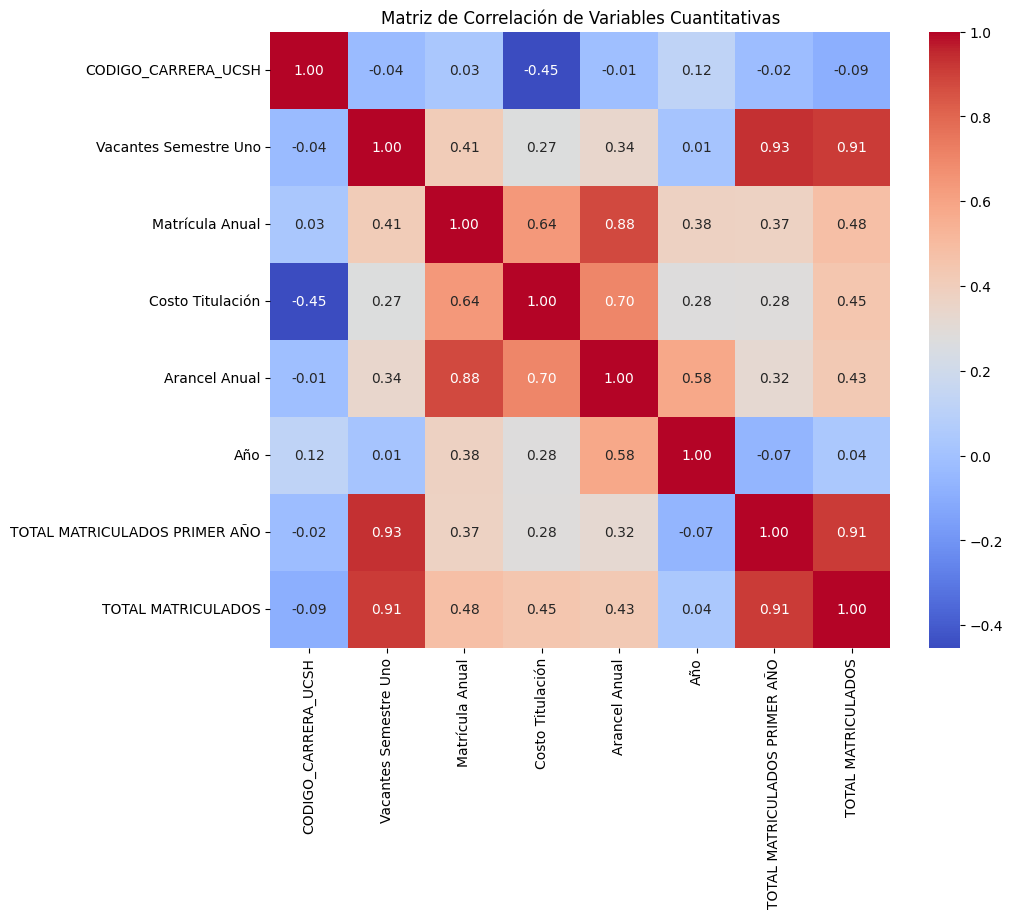

In [ ]:
# Calcular la matriz de correlación solo para columnas numéricas
corr_matrix_quant = df[quant_cols].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_quant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()


In [ ]:
data_train = df[df['Año'].isin([2016, 2017, 2018,2019, 2020, 2021, 2022, 2023, 2024])]
# Eliminar columnas no relevantes y manejar valores nulos
data_train_cleaned = data_train.fillna(0)

# Convertir variables categóricas a dummy variables
data_train_dummies = pd.get_dummies(data_train_cleaned, drop_first=True)

# Separar las variables independientes y dependientes utilizando 'TOTAL MATRICULADOS PRIMER AÑO'
X = data_train_dummies.drop(columns=['TOTAL MATRICULADOS PRIMER AÑO'])
y = data_train_dummies['TOTAL MATRICULADOS PRIMER AÑO']

# Inicializar y entrenar los modelos usando cross validation
models_ucsh = {
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
}

# Crear DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Model', 'MAE', 'R²'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Supongamos que ya tienes el DataFrame `df` y los datos preparados

# Filtrar los datos de entrenamiento
data_train = df[df['Año'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])]
# Eliminar columnas no relevantes y manejar valores nulos
data_train_cleaned = data_train.fillna(0)

# Identificar las columnas categóricas
categorical_cols = data_train_cleaned.select_dtypes(include=['object']).columns

# Convertir variables categóricas a dummy variables
data_train_dummies = pd.get_dummies(data_train_cleaned[categorical_cols], drop_first=True)

# Concatenar variables numéricas y variables dummy de las variables categóricas
X = pd.concat([data_train_cleaned.drop(columns=categorical_cols), data_train_dummies], axis=1)
y = data_train_cleaned['TOTAL MATRICULADOS PRIMER AÑO']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar los modelos usando cross validation
models_ucsh = {
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
}

# Crear DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Model', 'MAE', 'R²'])

# Realizar la búsqueda de hiperparámetros con GridSearchCV y evaluar los modelos
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    },
    'Support Vector Regressor': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

for model_name, model in models_ucsh.items():
    print(f"Buscando los mejores hiperparámetros para {model_name}...")
    grid_search = GridSearchCV(model, param_grids.get(model_name, {}), cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Predecir con el conjunto de prueba
    predictions = best_model.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Almacenar los resultados en el DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Model': model_name, 'MAE': mae, 'R²': r2}, index=[0])], ignore_index=True)

    print(f"Mejores hiperparámetros para {model_name}: {grid_search.best_params_}")
    print(f"MAE: {mae}, R²: {r2}\n")

# Visualizar los resultados
results_df = results_df.sort_values(by='MAE').reset_index(drop=True)
results_df = results_df.set_index('Model')
print(results_df)

# Predecir con el mejor modelo
best_model_name = results_df.index[0]
best_model = models_ucsh[best_model_name]
best_model.fit(X, y)


Buscando los mejores hiperparámetros para Decision Tree...
Mejores hiperparámetros para Decision Tree: {'max_depth': 30, 'min_samples_split': 2}
MAE: 0.7924528301886793, R²: 0.9950178248398723

Buscando los mejores hiperparámetros para Support Vector Regressor...
Mejores hiperparámetros para Support Vector Regressor: {'C': 10, 'epsilon': 0.01}
MAE: 27.623306207818132, R²: 0.11800458754612053

Buscando los mejores hiperparámetros para Linear Regression...
Mejores hiperparámetros para Linear Regression: {}
MAE: 8.559661747987216e-14, R²: 1.0

Buscando los mejores hiperparámetros para Random Forest...
Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 0.8333018867924527, R²: 0.9930363458111984

Buscando los mejores hiperparámetros para Gradient Boosting...
Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
MAE: 0.605468291295003, R²: 0.9952887653542265

                 

LinearRegression()

In [ ]:
# Entrenar el mejor modelo (Random Forest) con todos los datos

best_model.fit(X, y)


data_2025 = data_train_cleaned[data_train_cleaned['Año'] == 2024].copy()
data_2025['Año'] = 2025
data_2025 = data_2025.drop(columns=['TOTAL MATRICULADOS PRIMER AÑO'])

# Convertir variables categóricas a dummy variables
data_2025 = pd.get_dummies(data_2025, columns=['Jornada'], prefix='Jornada')

# Define los incrementos porcentuales para cada columna

incremento_dbm = 0.038          # Por ejemplo, incrementar por IPC%
incremento_arancel = 0.038      # Por ejemplo, incrementar por IPC%
incremento_titulacion = 0.038   # Por ejemplo, incrementar por IPC%

# Aplica los incrementos a las columnas correspondientes

data_2025['Matrícula Anual'] = data_2025['Matrícula Anual'] * (1 + incremento_dbm)
data_2025['Arancel Anual'] = data_2025['Arancel Anual'] * (1 + incremento_arancel)
data_2025['Costo Titulación'] = data_2025['Costo Titulación'] * (1 + incremento_titulacion)

# Redondear "DBM" a la centena más cercana y "Arancel" a los miles más cercanos
data_2025['Matrícula Anual'] = (data_2025['Matrícula Anual'] / 100).round() * 100
data_2025['Arancel Anual'] = (data_2025['Arancel Anual'] / 1000).round() * 1000
data_2025['Costo Titulación'] = (data_2025['Costo Titulación'] / 100).round() * 100


In [ ]:
# Alinear las columnas con las del conjunto de entrenamiento
data_2025 = data_2025.reindex(columns=X_train.columns, fill_value=0)

# Crear un conjunto de datos simulado para el año 2025
predictions_2025 = best_model.predict(data_2025)

# Añadir las predicciones al DataFrame 'data_2025'
data_2025['Prediccion_TOTAL_MATRICULADOS_2025'] = predictions_2025

In [ ]:
# Calcular el total de matriculados de primer año predichos para UCSH en 2025 utilizando Gradient Boosting
total_predicted_first_year_enrollments_2025 = predictions_2025_truncated.sum()
total_predicted_first_year_enrollments_2025

0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Cargar datos
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data.xlsx')
df.head()

# Filtrar solo las columnas numéricas
quant_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas seleccionadas:", quant_cols.tolist())

# Calcular la matriz de correlación solo para columnas numéricas
corr_matrix_quant = df[quant_cols].dropna().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_quant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

# Preparar datos de entrenamiento
data_train = df[df['Año'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])]
data_train_cleaned = data_train.fillna(0)

# Identificar y convertir variables categóricas a dummy variables
categorical_cols = data_train_cleaned.select_dtypes(include=['object']).columns
data_train_dummies = pd.get_dummies(data_train_cleaned[categorical_cols], drop_first=True)

# Concatenar variables numéricas y dummy variables
X = pd.concat([data_train_cleaned.drop(columns=categorical_cols), data_train_dummies], axis=1)
y = data_train_cleaned['TOTAL MATRICULADOS PRIMER AÑO']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar los modelos
models_ucsh = {
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
}

results_df = pd.DataFrame(columns=['Model', 'MAE', 'R²'])
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    },
    'Support Vector Regressor': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

for model_name, model in models_ucsh.items():
    print(f"Buscando los mejores hiperparámetros para {model_name}...")
    grid_search = GridSearchCV(model, param_grids.get(model_name, {}), cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Predecir con el conjunto de prueba
    predictions = best_model.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Almacenar los resultados en el DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Model': model_name, 'MAE': mae, 'R²': r2}, index=[0])], ignore_index=True)

    print(f"Mejores hiperparámetros para {model_name}: {grid_search.best_params_}")
    print(f"MAE: {mae}, R²: {r2}\n")

results_df = results_df.sort_values(by='MAE').reset_index(drop=True)
results_df = results_df.setIndex('Model')
print(results_df)

# Predecir con el mejor modelo
best_model_name = results_df.index[0]
best_model = models_ucsh[best_model_name]
best_model.fit(X, y)

# Crear conjunto de datos para 2025
data_2025 = data_train_cleaned[data_train_cleaned['Año'] == 2024].copy()
data_2025['Año'] = 2025
data_2025 = data_2025.drop(columns=['TOTAL MATRICULADOS PRIMER AÑO'])

# Convertir variables categóricas a dummy variables
data_2025 = pd.get_dummies(data_2025, columns=['Jornada'], prefix='Jornada')

# Incrementos porcentuales
incremento_dbm = 0.038
incremento_arancel = 0.038
incremento_titulacion = 0.038

data_2025['Matrícula Anual'] = data_2025['Matrícula Anual'] * (1 + incremento_dbm)
data_2025['Arancel Anual'] = data_2025['Arancel Anual'] * (1 + incremento_arancel)
data_2025['Costo Titulación'] = data_2025['Costo Titulación'] * (1 + incremento_titulacion)

data_2025['Matrícula Anual'] = (data_2025['Matrícula Anual'] / 100).round() * 100
data_2025['Arancel Anual'] = (data_2025['Arancel Anual'] / 1000).round() * 1000
data_2025['Costo Titulación'] = (data_2025['Costo Titulación'] / 100).round() * 100

def asignar_vacantes(codigo):
    valores_vacantes = {
        31: 35, 32: 40, 41: 60, 51: 120, 61: 45, 71: 40, 81: 120, 101: 75, 121: 0,
        141: 90, 151: 110, 152: 40, 191: 25, 201: 30, 221: 120, 231: 120, 251: 20,
        271: 100, 281: 45, 312: 30, 331: 40, 361: 70, 371: 110, 771: 90, 851: 60,
        861: 20
    }
    return valores_vacantes.get(codigo, 0)

data_2025['Vacantes Semestre Uno'] = data_2025['CODIGO_CARRERA_UCSH'].apply(asignar_vacantes)

# Eliminar carreras no ofertadas en 2025
codigo_a_eliminar = 121
data_2025 = data_2025[~((data_2025['Año'] == 2025) & (data_2025['CODIGO_CARRERA_UCSH'] == codigo_a_eliminar))]

# Alinear columnas con el conjunto de entrenamiento
data_2025 = data_2025.reindex(columns=X_train.columns, fill_value=0)

# Verificar estructura de data_2025
print(data_2025.head())
print(data_2025.columns)

# Verificar columnas con valores únicos
for column in data_2025.columns:
    if data_2025[column].nunique() == 1:
        print(f"Columna {column} tiene un único valor: {data_2025[column].unique()}")

# Verificar primeras filas de X_train y data_2025
print(X_train.head())
print(data_2025.head())

# Predecir con el mejor modelo
predictions_2025 = best_model.predict(data_2025)
print(predictions_2025)

# Truncar las predicciones a enteros
predictions_2025_truncated = np.trunc(predictions_2025).astype(int)

# Crear DataFrame con las predicciones
predictions_2025_df = pd.DataFrame({
    'Código Carrera': data_2025['CODIGO_CARRERA_UCSH'],
    'Vacantes Carrera': data_2025['Vacantes Semestre Uno'],
    'Predicción Matriculados Primer Año 2025': predictions_2025_truncated

SyntaxError: incomplete input (<ipython-input-18-8fbae03b5b28>, line 165)

Gradient Boosting